# ASTR596: Fundamentals of Data Science
## Week 1 In class exercise solutions - Part 6
#### Gautham Narayan <gsn@illinois.edu>

This notebook steps through the in class exercises during Week 1.
You are not required to do things this way, and indeed by the end of the semester, you'll probably have your own favorite ways to do things. That's totally OK.

In [1]:
# we use the numpy scipy and friends stack so much that it's worth just having things in the namespace
# you can do that with %pylab here
# The things that start with % are called `magics`
# There's a lot of them, and you can see the list here: 
# https://ipython.readthedocs.io/en/stable/interactive/magics.html
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


## Slide 75: Comparing Distributions

Now that you know how to generate points from a distribution, we can use the QQ plot to compare distributions to each other, or to a normal distribution

Use scipy.stats to generate some random numbers from a normal, uniform, and Cauchy distribution 

Use statsmodels.api.qqplot to produce a qq plot of these distributions

Now generate random numbers from two different normal distributions (different locations and variances) and concatenate them

Again check the QQ plot

In [2]:
import scipy.stats as st
import statsmodels.api as sm
from astropy.visualization import hist as ahist

In [3]:
# python lets you make lists of objects, including lists of functions themselves

dists = [st.poisson, st.uniform, st.expon, st.cauchy, st.chi2, st.norm]

# the poisson distribution needs a scale parameter specified
# the uniform distribution needs a range - we'll set it to have mean 0
# the cauchy has a sensible default of loc=0 and scale=1, so we'll leave that blank
# the chi-square distribution needs a degree of freedom

dist_args = [[2,], [-0.5, 0.5], [], [], [5,], []]

In [4]:
N = 1000 # we will draw a 1000 random samples 

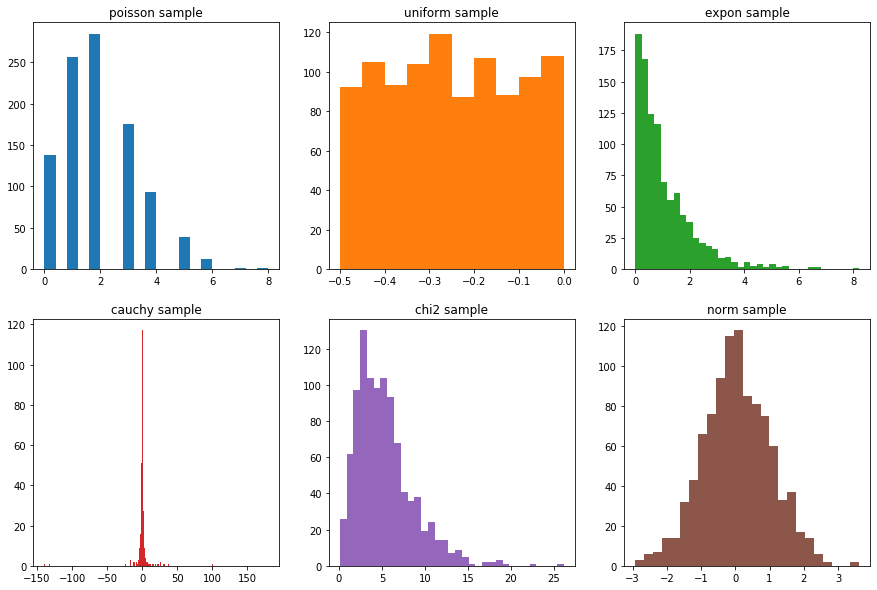

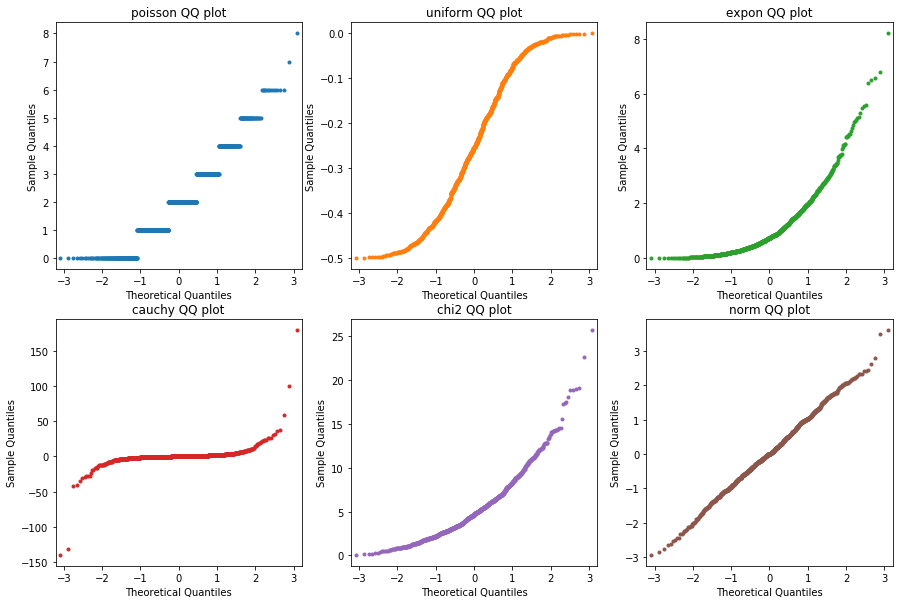

In [5]:
# we'll visualize this with a 3x3 plot showing the behavior of each distrib
fig1 = figure(figsize=(15, 10))
fig2 = figure(figsize=(15, 10))

for i, dist in enumerate(dists):
    args = dist_args[i]

    # draw N samples from the distribution
    X=dist.rvs(*args, size=N)
    
    plot_idx = i + 1
    color = f'C{i}'
    
    ax1 = fig1.add_subplot(2, len(dists)//2, plot_idx)
    ax2 = fig2.add_subplot(2, len(dists)//2, plot_idx)
    
    ahist(X, bins='freedman', ax=ax1, color=color)
    ax1.set_title(f'{dist.name} sample')
    
    sm.qqplot(X, ax = ax2, color=color, marker='.')
    ax2.set_title(f'{dist.name} QQ plot')

    # change the parameters of the distributions in dist_args to see how the QQ plots change 
    


In [6]:
samp_one_size = 300
samp_two_size = 1000-samp_one_size
new_X = np.concatenate( (st.norm.rvs(loc=-5, scale=3, size=samp_one_size),\
                         st.norm.rvs(loc=7, scale=0.05, size=samp_two_size)),\
                           axis=0)

Text(0.5, 1.0, 'QQ plot for the mixture model')

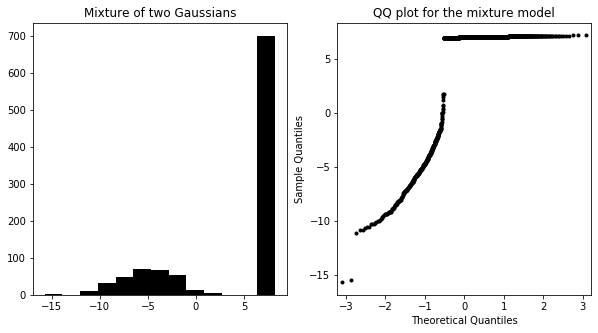

In [7]:
fig = plt.figure(figsize=(10, 5))
ax3 = fig.add_subplot(121)
ax4 = fig.add_subplot(122)
ahist(new_X, ax=ax3, color='k', bins='freedman')
ax3.set_title('Mixture of two Gaussians')
sm.qqplot(new_X, ax=ax4, color='k', marker='.')
ax4.set_title('QQ plot for the mixture model')

# Vary the fractions in each sample and mu, sigma to get a sense for how things change
# you can use loops or even just generate random numbers from a distribution :D
